# Quais as chances da sua empresa ter um pedido em atraso ? (Hackaton - iNeuron)

## iNeuron

---

A [iNeuron](https://ineuron.ai/home/) é uma empresa de Inteligência Artificial aplicada a soluções comerciais e com um enfático foco em educação com o objetivo de criar melhores soluções de analytics e business para a comunidade. 

Como mencionado acima, também possuem um grande foco na parte da educação, promovendo **hackatons** e novos métodos para melhorar a abordagem educacional.

## O Hackaton

---

Com o objetivo de envolver o público com o aprendizado de máquina, o [Hackaton](https://challenge-ineuron.in/mlchallenge.php#) trás 9 competições diferentes dividas em 3 desafios de aprendizado de máquina. Eles são:

1. ML CHALLENGE 1

    - Back Order Prediction
    - Bankruptcy
    - Restaurant Ratings


2. ML CHALLENGE 2

    - Cardiovascular disease
    - Dota
    - House Rent


3. ML CHALLENGE 3

    - Banking subscription
    - Incident Response Log
    - Kasandr
    
O desafio que vamos explorar é o de **Back Order Prediction**.

## Back Order Prediction

---

Inicialmente, temos que dar o mérito a quem merece.

A competição foi baseada em um [artigo](https://www.researchgate.net/profile/Rodrigo_Santis2/publication/319553365_Predicting_Material_Backorders_in_Inventory_Management_using_Machine_Learning/links/5a383a95a6fdccdd41fdeb99/Predicting-Material-Backorders-in-Inventory-Management-using-Machine-Learning.pdf) de BRASILEIROS (let's go), estes são:

1. Rodrigo Santis - UFMG
2. Eduardo P. de Aguiar - UFJF
3. Leonardo Goliatt - UFJF

## Descrição

---

> **Backorder:** Pedido em atraso.

Um *backorder* é um pedido que, por X motivos, a empresa não conseguiu cumprir.

**Exemplo**, a empresa não conseguiu acompanhar a entrega de um pedido devido a sua alta demanda.

Este *backorder* gera problemas para o cliente, já que seu pedido não chega, logo, a fidelidade com a empresa diminui. E aqui fica a pergunta: 

> **"Qual a empresa quer diminuir a fidelidade com o cliente?"**
>
> Resposta: Se eu fosse qualquer pessoa das finanças eu não queria diminuir essa fidelidade. 



Ainda utilizando o caso de que a empresa está com alta demanda de um produto, dependendo da empresa ela não conseguirá estocar todos estes produtos. Portanto é necessário que a empresa saiba para quais produtos ela pode enfrentar este problema (**esta é a nossa motivação para aplicar o aprendizado de máquina**).

Aqui alguns pontos interessantes que dá para retirar do texto original:

1. "Devido à alta demanda de um produto, a empresa não consegue acompanhar a entrega do pedido". 

2. Encontrar padrões para cada um dos produtos.

## Objetivo

---

Prever se o produto é um *backorder* ou não, isto é, se o produto ficou em atraso ou não.

Variável de cunho binária (0 ou 1).

## Dados 

---

Os dados se referem ao histórico de algumas semanas anterorires à semana que iremos prever. Possui 22 variáveis dependentes (explicativas). Elas são (tenhamos amor a minha vida, não irei traduzir as variáveis e tarefas): 

1. **sku** – Random ID for the product
2. **national_inv** – Current inventory level for the part
3. **lead_time** – Transit time for product (if available)
4. **in_transit_qty** – Amount of product in transit from source
5. **forecast_3_month** – Forecast sales for the next 3 months
6. **forecast_6_month** – Forecast sales for the next 6 months
7. **forecast_9_month** – Forecast sales for the next 9 months
8. **sales_1_month** – Sales quantity for the prior 1 month time period
9. **sales_3_month** – Sales quantity for the prior 3 month time period
10. **sales_6_month** – Sales quantity for the prior 6 month time period
11. **sales_9_month** – Sales quantity for the prior 9 month time period
12. **min_bank** – Minimum recommend amount to stock
13. **potential_issue** – Source issue for part identified
14. **pieces_past_due** – Parts overdue from source
15. **perf_6_month_avg** – Source performance for prior 6 month period
16. **perf_12_month_avg** – Source performance for prior 12 month period
17. **local_bo_qty** – Amount of stock orders overdue
18. **deck_risk** – Part risk flag
19. **oe_constraint** – Part risk flag
20. **ppap_risk** – Part risk flag
21. **stop_auto_buy** – Part risk flag
22. **rev_stop** – Part risk flag
23. **went_on_backorder** – Product actually went on backorder. This is the target value.


## Tasks (Tarefas dadas pelo Hackaton)

---

1.	Do a complete EDA in the python notebook file;
2.	Build a solution design architecture for end to end solution starting from data ingestion to deployment with a detail documentation;
3.	Deploy the end to end automated solution to AWS;
4.	Create a user interface for bulk testing uploaded through excel sheet and for a single record entry both;
5.	Maintain log for each and every prediction request into any database;
6.	Create a low level documentation for end to end solution and deployment;
7.	Define a retraining approach in your documentation;
8.	Create an end to end video of the working of the project.


## Evaluation criteria (Critérios de avaliação)

---

1.	Solution will be evaluated based on the best architecture design of the entire solution;
2.	Solution will be evaluated based on the best EDA;
3.	Solution will be evaluated based on the **best optimization and model accuracy on unseen dataset**;
4.	Solution will be evaluated based on final deployment and testing with a bulk dataset as well as data  with single entry;
5.	Solution will be evaluated based on the best readability and proper commenting of the code;
6.	Solution will be evaluated based on best interactive user interface;
7.	 On the basis of the given data in the features column and target column, you have to build a model which will be able to predict whether an order for a given product can go on backorder or not.


## Timeline (Duração da competição)

---

Vai (ou foi, não sei em que momento você está lendo isso) de 06/05/2020 à 14/06/2020. 

## Prizes (Money, Cash, Dindin, Grana, Premiação)

---

Algo que não iremos ligar muito, pois o objetivo com essa competição é o **aprendizado**.

1. 1st Place - ₹50,000
2. 2nd Place - ₹30,000
3. 3rd Place - ₹20,000

Para quem não sabe, esta moeda (₹) é a Rupia Indiana e, atualmente, custa:

1 Rupia indiana igual a
0,078 Real brasileiro
14 de mai. 14:27 UTC ·

# Considerações iniciais

## Importando as bibliotecas

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Configurações adicionais

In [30]:
plt.style.use("seaborn-muted")
%matplotlib inline
pd.set_option('display.max_columns', None)

## Importando os dados

In [31]:
banco = pd.read_csv("Training_Dataset_v2.csv")

C:\Users\Rafael\miniconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [32]:
dados = banco.copy()

In [33]:
dados.head()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1026827,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,-99.00,-99.00,0.0,No,No,No,Yes,No,No
1,1043384,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,0.99,0.99,0.0,No,No,No,Yes,No,No
2,1043696,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
3,1043852,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,No,0.0,0.10,0.13,0.0,No,No,No,Yes,No,No
4,1044048,8.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,No,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No


In [34]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1687861 entries, 0 to 1687860
Data columns (total 23 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   sku                1687861 non-null  object 
 1   national_inv       1687860 non-null  float64
 2   lead_time          1586967 non-null  float64
 3   in_transit_qty     1687860 non-null  float64
 4   forecast_3_month   1687860 non-null  float64
 5   forecast_6_month   1687860 non-null  float64
 6   forecast_9_month   1687860 non-null  float64
 7   sales_1_month      1687860 non-null  float64
 8   sales_3_month      1687860 non-null  float64
 9   sales_6_month      1687860 non-null  float64
 10  sales_9_month      1687860 non-null  float64
 11  min_bank           1687860 non-null  float64
 12  potential_issue    1687860 non-null  object 
 13  pieces_past_due    1687860 non-null  float64
 14  perf_6_month_avg   1687860 non-null  float64
 15  perf_12_month_avg  1687860 non-n

In [35]:
dados.shape

(1687861, 23)

## Retirar a variável `sku`

---

Como mencionada na descrição desta variável, temos que ela é apenas um ID randômico para cada produto.

In [36]:
dados = dados.drop("sku", axis = 1) 

## Codificar a variável went_on_backorder em 0 e 1

---

In [37]:
columns_yesno = ["potential_issue", "deck_risk", "oe_constraint", "ppap_risk", "stop_auto_buy", "rev_stop", "went_on_backorder"]

dados[columns_yesno] = dados[columns_yesno].replace({"No" : 0, "Yes": 1})

In [38]:
dados["deck_risk"].value_counts()

0.0    1300377
1.0     387483
Name: deck_risk, dtype: int64

## Valores faltantes

---

Como podemos notar, existe exatamente pelo menos um valor faltante para cada uma das variáveis a seguir.

In [39]:
dados.isnull().sum()

national_inv              1
lead_time            100894
in_transit_qty            1
forecast_3_month          1
forecast_6_month          1
forecast_9_month          1
sales_1_month             1
sales_3_month             1
sales_6_month             1
sales_9_month             1
min_bank                  1
potential_issue           1
pieces_past_due           1
perf_6_month_avg          1
perf_12_month_avg         1
local_bo_qty              1
deck_risk                 1
oe_constraint             1
ppap_risk                 1
stop_auto_buy             1
rev_stop                  1
went_on_backorder         1
dtype: int64

---

Como essa é uma baseline e não estamos pensando em fazer o **M O D E L O**, então vamos simplesmente retirar as informações faltantes de todas as variáveis, pois não estamos perdendo tantos dados também.

In [40]:
dados = dados.dropna()

# Criar uma baseline

---

A baseline é um modelo simples que tomamos como base pra ver a acurácia dos modelos.

**Se não conseguimos bater um modelo simples, por que fazer um modelo complicado ?**

Um modelo simples a ser utilizado é a Regressão Logística, mas nela vamos ajustar os parâmetros lá dentro, devido ao desbalanceamento da variável target (**went_on_backorder**).

## Separando os dados em treino e teste

---

> **50/50**

ou 

> **70/30**

Melhor optar pelo 70/30 desta vez.

In [41]:
from sklearn.model_selection import train_test_split

x_treino, x_teste, y_treino, y_teste = train_test_split(dados.drop("went_on_backorder", axis = 1),
                                                        dados["went_on_backorder"], 
                                                        train_size = 0.7,
                                                        random_state = 1234,
                                                        stratify = dados["went_on_backorder"])

In [42]:
print(x_treino.shape, y_treino.shape, x_teste.shape, y_teste.shape)

(1110876, 21) (1110876,) (476091, 21) (476091,)


## Aplicando a regressão logística

---

### Modelo

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.utils import class_weight

class_weight1 = class_weight.compute_class_weight('balanced', np.unique(y_treino), y_treino)

logreg = LogisticRegression(class_weight = class_weight1, random_state = 1234)

logreg.fit(x_treino, y_treino)

C:\Users\Rafael\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:856: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if class_weight == "balanced":
C:\Users\Rafael\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=array([ 0.50347988, 72.34149518]),
                   dual=False, fit_intercept=True, intercept_scaling=1,
                   l1_ratio=None, max_iter=100, multi_class='auto', n_jobs=None,
                   penalty='l2', random_state=1234, solver='lbfgs', tol=0.0001,
                   verbose=0, warm_start=False)

### Matriz de confusão

![](https://miro.medium.com/max/1400/1*s7VB26Cfo1LdVZcLou-e0g.png "Confusion Matrix")

**Nota**: Retirado de https://medium.com/@vitorborbarodrigues/m%C3%A9tricas-de-avalia%C3%A7%C3%A3o-acur%C3%A1cia-precis%C3%A3o-recall-quais-as-diferen%C3%A7as-c8f05e0a513c


**Exemplo**: Criamos um classificador para classificar se é gato ou cachorro. Abaixo podemos ver a matriz de confusão do nosso modelo hipotético.


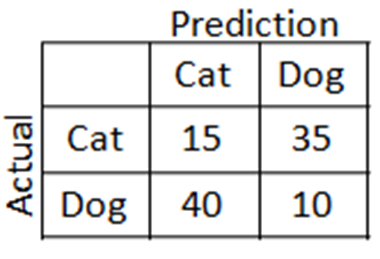

In [44]:
from IPython.display import Image

Image(filename = "matriz_de_confusao.png") 

**Nota**: Retirado de https://minerandodados.com.br/matriz-de-confusao/


> **Verdadeiro Positivo:** Parabéns, seu modelo acertou **15** exemplos de gatos, quando realmente eles eram para ser classificado como gatos;

> **Falso Negativo (Erro do tipo II):** Meh, seu modelo classificou **35** exemplos de cachorros, quando a verdadeira classe deles eram gatos;

> **Falso Positivo (Erro do tipo I):** Puts, seu modelo classificou **40** exemplos de gatos, quando a verdadeira classe deles eram cachorros;

> **Verdadeiro Negativo:** Good Job, seu modelo classificou **10** exemplos de cachorros, quando realmente eles eram para ser classificado como cachorros.


Aí fica a dúvida: Agora nós temos o famoso *trade-off* que é mais importante: 

- Classificar um cachorro que na verdade era um gato ?
- Classificar um gato que na verdade era um cachorro ?

> **Se você estender esse exemplo para a questão de fraudes, temos que pensar bastante sobre esse *trade-off*.**


Por meio da matriz de confusão, podemos retirar diversas métricas de nosso interesse, entre elas estão:

1. Acurácia;
2. Precisão;
3. Recall;
4. F1-Score;
5. ROC e AUC.

#### Acurácia

O cálculo da acurácia é dado por

$$\text{Acc}  = \frac{\text{Verdadeiros Positivos (VP)} + \text{Verdadeiro Negativo (VN)}}{\text{Total}}$$


**Interpretação**: O quanto de acerto o nosso modelo teve nos exemplos, em relação ao total de exemplos. 

> Segundo o [post](https://www.mariofilho.com/as-metricas-mais-populares-para-avaliar-modelos-de-machine-learning/) do [Mario Filho](https://www.linkedin.com/in/mariofilho) e [este](https://mineracaodedados.wordpress.com/2014/11/16/metricas-de-avaliacao-de-modelos-de-classificacaopredicao/) do [Flávio Clésio](https://mineracaodedados.wordpress.com/author/flavioclesio/) a **acurácia** nos dá uma falsa impressão de qualidade do modelo quando os dados são desbalanceados (*e.g*, em 98% dos casos não ocorreu a fraude e em 2% sim).

#### Precisão

A precisão é dada por

$$\text{Prec}  = \frac{\text{Verdadeiros Positivos (VP)}}{\text{Verdadeiros Positivos (VP)} + \text{Falsos Positivos (FP)}}$$


**Interpretação**: O quão precisa foram as minhas predições para a classe positiva.

> **Segundo o Mario Filho em seu [blog](https://www.mariofilho.com/as-metricas-mais-populares-para-avaliar-modelos-de-machine-learning/)**: para o nosso modelo ela seria utilizada para responder a seguinte questão: de todos os comentários classificados como positivos, qual percentual realmente é positivo?

#### Recall

O Recall é dado por 

$$\text{Recall}  = \frac{\text{Verdadeiros Positivos (VP)}}{\text{Verdadeiros Positivos (VP)} + \text{Falsos Negativos (FN)}}$$


**Interpretação**: De todos os exemplos que realmente são verdadeiros, o quanto meu modelo meu modelo previu corretamente.

#### F1-Score

$$\text{F1-Score}  = 2 \times \frac{\text{Prec} \times \text{Recall}}{\text{Prec} + \text{Recall}}$$


**Interpretação**: Média harmônica entre a Precisão e o Recall. Quanto maior, melhor.

Segundo o [post](https://www.mariofilho.com/as-metricas-mais-populares-para-avaliar-modelos-de-machine-learning/) do Mario Filho:

> **Ela é muito boa quando você possui um dataset com classes desproporcionais, e o seu modelo não emite probabilidades.**

#### ROC (Receiver Operating Characteristic) e AUC (Area Under The Curve)

A **Curva ROC** traça a relação Taxa de Verdadeiros Positivos: $\frac{\text{VP}}{\text{VP} + \text{FN}}$ vs Taxa de Falsos Positivos: $\frac{\text{FP}}{\text{VN} + \text{FP}}$, em diferentes pontos de corte. Quanto mais alto e distante da reta linear (em tracejado), melhor é o modelo.


![](https://miro.medium.com/max/722/1*pk05QGzoWhCgRiiFbz-oKQ.png)

**Retirado de**: https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5


Já a **AUC** é uma medida resumo a curva ROC caso você não queira ter que olhar para o gráfico e interpretar: "meu modelo está performando bem ou não ?". Assim como a curva ROC, quanto mais próxima de 1 a AUC estiver, melhor o modelo.


Segundo este [post](https://www.mariofilho.com/as-metricas-mais-populares-para-avaliar-modelos-de-machine-learning/) e este [post](http://www.inf.ufpr.br/menotti/ci171-182/slides/ci171-boasmaneiras.pdf)

> A curva ROC e a AUC são uma boa métrica para dados desbalanceados, já que elas são baseadas somente na Taxa de Verdadeiros Positivos e Falsos Positivos. 

Agora que sabemos as métricas e como se analisar uma matriz de confusão, podemos criar esta com as seguintes linhas de comando:

In [45]:
from sklearn.metrics import confusion_matrix

previsao = logreg.predict(x_teste)

confusion_matrix_baseline = confusion_matrix(y_teste, previsao)

print(confusion_matrix_baseline)

[[472776     24]
 [  3289      2]]


In [46]:
acc_baseline = logreg.score(x_teste, y_teste) 

print("A acurácia da baseline foi:", acc_baseline)

A acurácia da baseline foi: 0.9930412463163555


In [47]:
# Precision, Recall and F1-score

from sklearn.metrics import classification_report

print(classification_report(y_teste, previsao))

              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00    472800
         1.0       0.08      0.00      0.00      3291

    accuracy                           0.99    476091
   macro avg       0.54      0.50      0.50    476091
weighted avg       0.99      0.99      0.99    476091



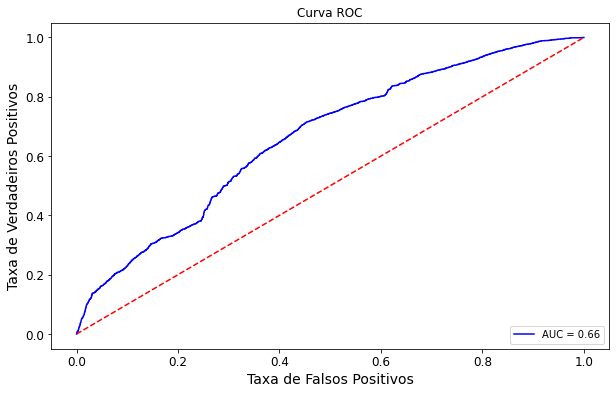

In [48]:
#--- Adaptado de: https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python

import sklearn.metrics as metrics

probs = logreg.predict_proba(x_teste)
preds = probs[:,1]
fpr, vpr, threshold = metrics.roc_curve(y_teste, preds)
roc_auc = metrics.auc(fpr, vpr)

#--- Curva

plt.figure(figsize = [10, 6])
plt.title("Curva ROC")
plt.plot(fpr, vpr, "blue", label = "AUC = %0.2f" % roc_auc)
plt.legend(loc = "lower right")
plt.plot([0, 1], [0, 1], "r--")
plt.ylabel("Taxa de Verdadeiros Positivos", fontsize = 14, color = "black")
plt.xlabel("Taxa de Falsos Positivos", fontsize = 14, color = "black")
plt.tick_params(axis = "x", labelsize = 12, labelcolor = "black")
plt.tick_params(axis = "y", labelsize = 12, labelcolor = "black")
plt.show()

---

Bom, com tudo isso, temos uma baseline com acurácia de 0.9930412463163555. 

**NOW**, we can go to the tasks (não liguem para os textos em inglês aleatórios, é pra treinar).

# Tarefas

---

Dado que temos o que fazer, vamos botar a mão na massa.

> **Lembrem-se:** Primeiro vem a análise sobre o gráfico/tabela/informação, logo após vem o resultado deste.

## Task 1: Do a complete EDA in the python notebook file

---

Com a informação abaixo, podemos confirmar que o dataset possui 23 variáveis, sendo 22 explicativas e uma 1 independente (target).

Inclusive, não sei vocês perceberam mas a baseline foi feita com base na variável `dados` e todas as transformações também.
Por isso que lá bem no começo eu salvei uma cópia numa variável chamada `banco` para fazermos todas as modificações novamente e explorar os dados.

~Eu queria colocar o GIF do Stonks aqui mas ele não estava renderizando no github.~

- Podemos notar que a natureza dos dados são de grandezas diferentes, significando que dependendo do modelo que utilizarmos devemos padronizar determinadas (ou todas) as variáveis quantitativas;

- Atenção para as variáveis:

    - **national_inv:** Temos um valor mínimo negativo. **Existe algum nível negativo de estoque da peça?** Será que significa que estes números negativos são que a peça está em falta, se ela está com alta demanda e em falta. **Hipótese 1: Será que as peças que possuem valores negativos, têm algum tipo de relacionamento com os pedidos em atraso?"**
    
    - **lead_time**: Será que o tempo de trânsito de X produto influencia em termos um pedido em atraso ? **Hipótese 2**.
    
    - **min_bank:** Ela nos fala sobre a quantidade mínima recomendada para ter X peça em estoque. Aparentemente, ela pode ter uma relação com a variável **national_inv**: "Se tivermos um produto com "estoque negativo", a variável min_bank vai nos informar algo ?" (**Hipótese 3**).
    
    - **perf_X_month_avg**: Será que a performance nos meses X (6 e 12) afetam no atraso dos pedidos? (**Hipótese 4**).

In [49]:
#--- Excluindo a variável SKU

banco = banco.drop("sku", axis = 1) 

In [62]:
banco.describe().round(2)

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty
count,1687860.00,1586967.00,1687860.00,1687860.00,1687860.00,1687860.00,1687860.00,1687860.00,1687860.00,1687860.00,1687860.00,1687860.00,1687860.00,1687860.00,1687860.00
mean,496.11,7.87,44.05,178.12,344.99,506.36,55.93,175.03,341.73,525.27,52.77,2.04,-6.87,-6.44,0.63
std,29615.23,7.06,1342.74,5026.55,9795.15,14378.92,1928.20,5192.38,9613.17,14838.61,1254.98,236.02,26.56,25.84,33.72
min,-27256.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-99.00,-99.00,0.00
25%,4.00,4.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.63,0.66,0.00
50%,15.00,8.00,0.00,0.00,0.00,0.00,0.00,1.00,2.00,4.00,0.00,0.00,0.82,0.81,0.00
75%,80.00,9.00,0.00,4.00,12.00,20.00,4.00,15.00,31.00,47.00,3.00,0.00,0.97,0.95,0.00
max,12334404.00,52.00,489408.00,1427612.00,2461360.00,3777304.00,741774.00,1105478.00,2146625.00,3205172.00,313319.00,146496.00,1.00,1.00,12530.00


### Explorando a variável target (went_on_backorder)

- Aqui temos um leve (mentira, grandíssimo) problema de desbalanceamento de classes. Isso irá afetar quais métricas, iremos utilizar para analisar o modelo de previsão. 

- O que seria pior para o nosso caso:

> Ter um **Falso Positivo**, isto é, o nosso modelo prever que **houve** atraso para X produto, quando realmente não houve;

> Ter um **Falso Negativo**, isto é, o nosso modelo prever que **não houve** um atraso para X produto, quando realmente houve o atraso.

- Métricas para utilizarmos:

    1. Precision;
    2. Recall; e
    3. F1-Score.
    4. (Quem sabe ROC/AUC)

In [51]:
pd.concat([banco["went_on_backorder"].value_counts(), 
                banco["went_on_backorder"].value_counts(normalize = True).mul(100).round(2)], 
          axis = 1, keys = ("Quantidade", "Percentual"))

,Quantidade,Percentual
No,1676567,99.33
Yes,11293,0.67


### Explorando as variáveis quantitativas

---

Para você leitor que não quer voltar a barra e eu, como um boa pessoa que pensa em você, trago novamente o significado das variáveis aqui.

1. **sku** – Random ID for the product
2. **national_inv** – Current inventory level for the part
3. **lead_time** – Transit time for product (if available)
4. **in_transit_qty** – Amount of product in transit from source
5. **forecast_3_month** – Forecast sales for the next 3 months
6. **forecast_6_month** – Forecast sales for the next 6 months
7. **forecast_9_month** – Forecast sales for the next 9 months
8. **sales_1_month** – Sales quantity for the prior 1 month time period
9. **sales_3_month** – Sales quantity for the prior 3 month time period
10. **sales_6_month** – Sales quantity for the prior 6 month time period
11. **sales_9_month** – Sales quantity for the prior 9 month time period
12. **min_bank** – Minimum recommend amount to stock
13. **potential_issue** – Source issue for part identified
14. **pieces_past_due** – Parts overdue from source
15. **perf_6_month_avg** – Source performance for prior 6 month period
16. **perf_12_month_avg** – Source performance for prior 12 month period
17. **local_bo_qty** – Amount of stock orders overdue
18. **deck_risk** – Part risk flag
19. **oe_constraint** – Part risk flag
20. **ppap_risk** – Part risk flag
21. **stop_auto_buy** – Part risk flag
22. **rev_stop** – Part risk flag
23. **went_on_backorder** – Product actually went on backorder. This is the target value.

- Novamente, essa variável me parece muito estranha (falando como analista de dados). Me autoparafraseando da frase de cima:

> Existe algum nível negativo de estoque da peça?

- A distribuição dos dados não fortalece qualquer tipo de análise sobre ela, apenas que temos bastante dados próximas ao 0 indicando que muitos dos produtos possuem estão em estoque.

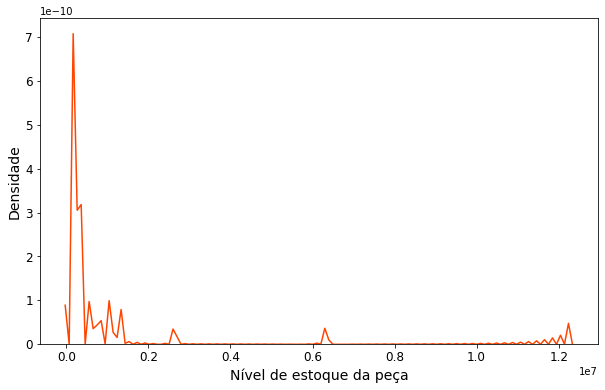

In [85]:
plt.figure(figsize = [10, 6])

#---

sns.distplot(dados["national_inv"], color = "orangered", hist = False)
plt.xlabel("Nível de estoque da peça", fontsize = 14, color = "black")
plt.ylabel("Densidade", fontsize = 14, color = "black")
plt.tick_params(axis = "x", labelsize = 12, labelcolor = "black")
plt.tick_params(axis = "y", labelsize = 12, labelcolor = "black")

---

- A `lead_time` tem cara de tempo estimado de trânsito do produto;
- Como não sabemos em qual unidade de tempo está, só podemos analisar aqui que a maioria dos produtos são entregues em até 20 unidades de tempo;
- Volte um pouco ali em cima, para ver a tabela de resumo estatístico, podemos confirmar que 75% dos produtos são entregues em até 9 unidades de tempo, isto é;
- Entretanto, não podemos deixar de mencionar aquele pico ali em cima do 50, algum dos produtos demorou mais que 50 unidades de tempo para ser entregue.

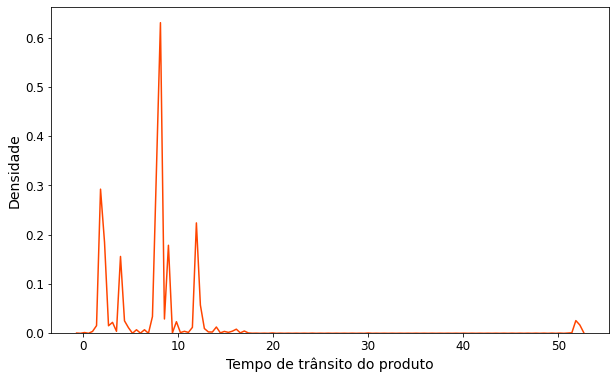

In [100]:
plt.figure(figsize = [10, 6])

#---

sns.distplot(dados["lead_time"], color = "orangered", hist = False)
plt.xlabel("Tempo de trânsito do produto", fontsize = 14, color = "black")
plt.ylabel("Densidade", fontsize = 14, color = "black")
plt.tick_params(axis = "x", labelsize = 12, labelcolor = "black")
plt.tick_params(axis = "y", labelsize = 12, labelcolor = "black")

# Voltar a partir daqui analisando a relação entre as variáveis

## Univariada e Multivariada

# Referências

## Métricas

1. https://medium.com/@vitorborbarodrigues/m%C3%A9tricas-de-avalia%C3%A7%C3%A3o-acur%C3%A1cia-precis%C3%A3o-recall-quais-as-diferen%C3%A7as-c8f05e0a513c
2. https://gabrielschade.github.io/2019/03/12/ml-classificacao-metricas.html (ótimas interpretações)
3. https://www.mariofilho.com/as-metricas-mais-populares-para-avaliar-modelos-de-machine-learning/
4. https://paulovasconcellos.com.br/como-saber-se-seu-modelo-de-machine-learning-est%C3%A1-funcionando-mesmo-a5892f6468b
5. https://minerandodados.com.br/cafe-com-codigo-09-metricas-de-avaliacao-de-modelos/
6. https://mineracaodedados.wordpress.com/2014/11/16/metricas-de-avaliacao-de-modelos-de-classificacaopredicao/
7. https://stanford.edu/~shervine/l/pt/teaching/cs-229/dicas-truques-aprendizado-maquina#classification-metrics
8. https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5

## Lidando com desbalanceamento nos dados

1. https://www.kaggle.com/janiobachmann/credit-fraud-dealing-with-imbalanced-datasets
2. https://www.kaggle.com/shahules/tackling-class-imbalance